# Phys 111 Final Project
## Lev Gruber, Charlie Schofield

A simplified model to study a bio-inspired triple spring mechanism. 

This jupyter notebook is arranged into the following sections:
1. **Test solution** ~ solving for both positions over time.
2. **Surfaces of section** / Poincare surfaces.
3. Position 1 vs. Position 2. curves

In [1]:
'''

Imports and LaTex formatting

'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, odeint

plt.rcParams['text.usetex'] = True

In [ ]:
# Define global constants for the system
m_1 = 1
m_2 = 2
e_1 = 10
e_2 = 10
e_3 = 10
a = 0.1
l = 1

c_1 = (e_1 * a * l) / 3
c_2 = (e_2 * a * l) / 3
c_3 = (e_3 * a * l) / 3

def deriv(t, q):
    '''
    Inputs: 
    - q (array): 
    - t (float): time
    Outputs:
    - [dq1_dt, dq2_dt, dq1_dot_dt, dq2_dot_dt]
    '''
    # pull out variables from input array
    q_1, q_2, v_1, v_2 = q
    
    # define derivatives
    q_1_dot = v_1
    q_2_dot = v_2
    
    # test w/ non-linear springs
    k_1 = 5
    k_2 = 5
    k_3 = 5
    e_1 = 1
    e_2 = 1
    e_3 = 1
    
    v_1_dot = 1/m_1 * (-k_1 * q_1 -  e_1 * q_1 ** 2 + k_2 * (q_2 - q_1) + e_2 * (q_2 - q_1)**2)
    v_2_dot = 1/m_2 * (-k_3 * q_2 - e_3 * q_2**2 - k_2 * (q_2 - q_1) - e_2 * (q_2 - q_1) **2 )
    
    return [q_1_dot, q_2_dot, v_1_dot, v_2_dot]



### Section 1
This section contains a sample solution to the Euler-Lagrange equations of motion for this model. First define a function per mass to take our derivatives.

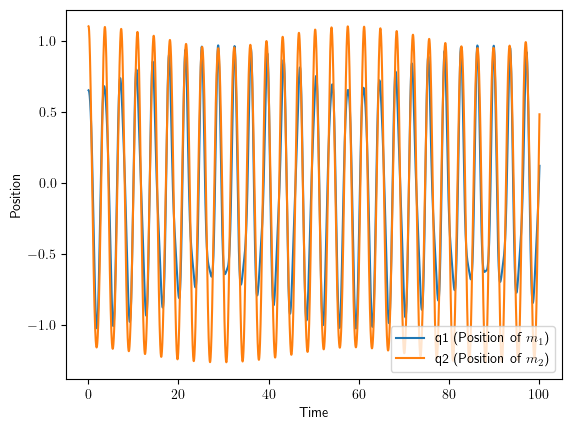

The solver successfully reached the end of the integration interval.
A single point has q_1 -0.668 q_2 -0.998 q_1_dot -1.231 q_2_dot -0.979


In [55]:
# Instantiate initial conditions
y0 = [0.65, 1.1, 0, 0]

# Instantiate time span
t_start = 0.1
t_end = 100
t = np.linspace(t_start, t_end, 10000)

# Solve the system using solve_ivp
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-6, atol=1e-8)

# Check if the integration was successful
plt.plot(result.t, result.y[0], label=r'q1 (Position of $m_1$)')
plt.plot(result.t, result.y[1], label=r'q2 (Position of $m_2$)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()
# for troubleshooting
print(result.message)
print('A single point has q_1', round(result.y[0][500],3), 'q_2', round(result.y[1][500],3), 'q_1_dot', round(result.y[2][500],3), 'q_2_dot', round(result.y[3][500],3))

for i, q1_res in enumerate(result.y[0]):
    q2_res = result.y[1][i]
    if abs(q2_res - q1_res) > 1:
        print("This system became non-physical at:", result.t[i])
    

Text(0, 0.5, 'Velocity')

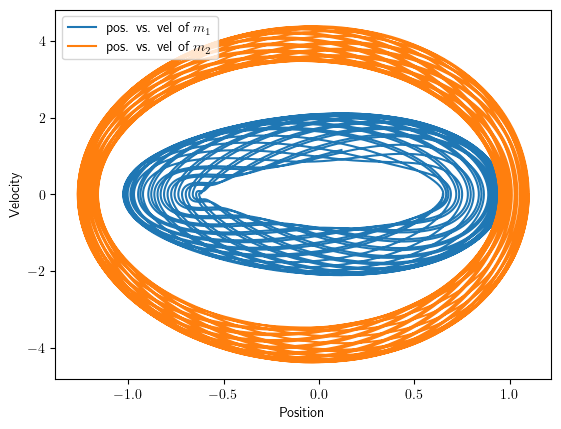

In [56]:
plt.plot(result.y[0], m_1 * result.y[2], label=r'pos. vs. vel of $m_1$')
plt.plot(result.y[1], m_2 * result.y[3], label=r'pos. vs. vel of $m_2$')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Velocity')


### Hamiltonian Conservation Check

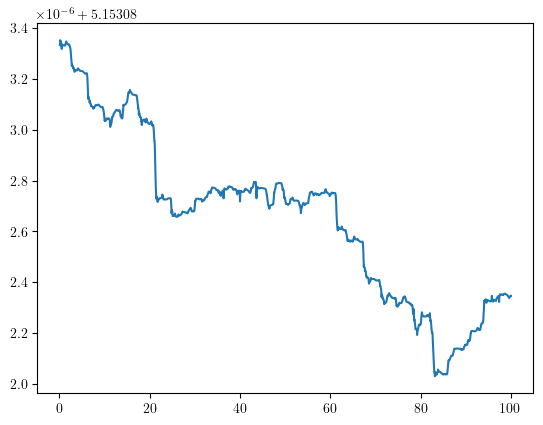

In [ ]:
'''

The hamiltonian is the total energy, as we are in cartesian coordinates, and the lagrangian does not have explicit time dependence such that it must be conserved.
We ensure our code follows this.

'''


def hamilton_cons_2nd_order(result):
    '''
    
    For non-linear spring system w/ only quadratic term
    
    '''
    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    k_1 = 5
    k_2 = 5
    k_3 = 5
    e_1 = 1
    e_2 = 1
    e_3 = 1
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 * l**2 * q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = (k_1 * q_1 **2)/2 + (k_3 * q_2 ** 2)/2 + (k_2 * (q_2 - q_1)**2)/2 + (e_1 * q_1 ** 3)/3 + (e_2 * (q_2 - q_1)**3)/3 + (e_3 * q_2**3)/3
    ham = kin_eng + pot_eng
    return ham


result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10)
#ham_result = hamilton_cons(result)
ham_result = hamilton_cons_2nd_order(result) 


# Check if the integration was successful
plt.plot(result.t, ham_result, label=r'Hamiltonian $(T + U)$')


    

In [ ]:
'''

Neo-Hookean Spring Old Code


 # original stuff
#v_1_dot = (1)/(m_1 * l**2) * (c_1 * ( -(1+q_1) + 1/(1+q_1)**2) + c_2 * ( (1 + q_2 - q_1) - 1 / (1 + q_2 - q_1)**2 ))
# #v_2_dot = (1)/(m_2 * l**2) * (c_3 * ( -(1+q_2) + 1/(1+q_2)**2) - c_2 * ( (1 + q_2 - q_1) + 1 / (1 + q_2 - q_1)**2 ))
    
# test w/ linear springs
#v_1_dot = -2*(c_1 / m_1) * q_1 + (c_2 / m_1) * q_2
#v_2_dot = (c_1 / m_2) * q_1 - 2*(c_2 / m_2) * q_2


#didn't work but it's her
# edef hamilton_cons(result):
    
    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 *  q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = c_1 * ( ((1 + q_1)**2)/2 + 1/(1 + q_1) - 3/2) + c_2 * ( ((1+q_2-q_1)**2)/2 + 1/(1 + q_2 - q_1) - 3/2) + c_3 * ( ((1 + q_2)**2)/2 + 1/(1 + q_2) - 3/2)
    ham = kin_eng + pot_eng
    return ham

#linear springs do work
def hamilton_cons_1st_order(result):
    
    For linear spring system

    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    k = 5 #c_1
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 * l**2 * q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = k * q_1 ** 2 + k * q_2**2 - k * q_1 * q_2
    ham = kin_eng + pot_eng
    return ham
'''
